# Predicting Data through Machine Learning

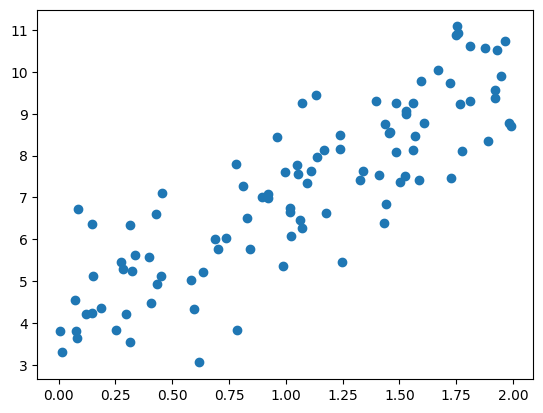

In [23]:
import matplotlib.pyplot as plt
import numpy as np
x = 2 * np.random.rand(100,1) # [0, 1) 범위에서 균일한 분포 100 X 1 array 
y = 4 + 3*x + np.random.randn(100,1) # normal distribution(mu=0,var=1)분포 100 X 1 array
plt.scatter(x,y)
plt.show()

In [ ]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가

# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

In [36]:
# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
prediction = x_new_b.dot(theta_best)
prediction

array([[4.03322436],
       [9.95626786]])

In [35]:
x_new,prediction

(array([[0],
        [2]]),
 array([[4.03322436],
        [9.95626786]]))

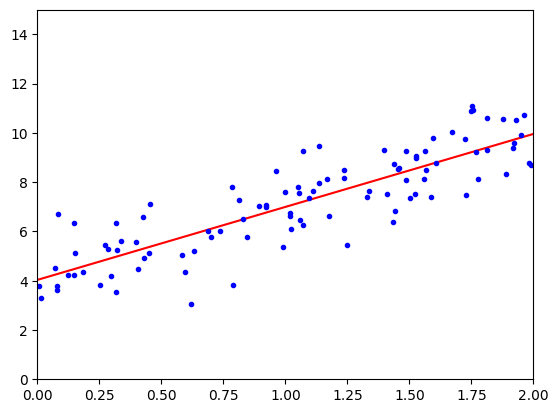

In [31]:
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15 
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y) #학습 코드
print(lin_reg.intercept_,lin_reg.coef_)

[4.03322436] [[2.96152175]]


In [ ]:
print(lin_reg.predict(x_new))

In [37]:
lin_reg.predict(x_new)

array([[4.03322436],
       [9.95626786]])

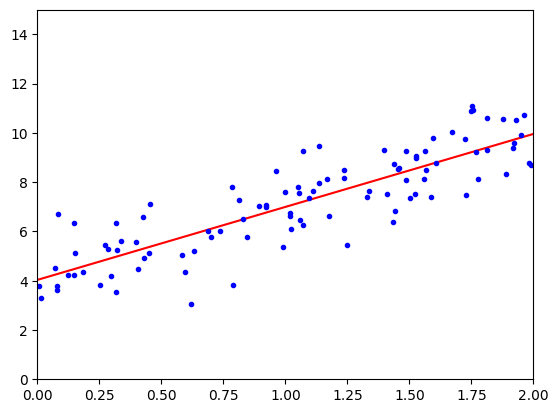

In [38]:
plt.plot([0,2],lin_reg.predict(x_new),"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15 
plt.show()

## Separating Data Sets (training & Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

In [ ]:
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

## Modelling 

In [1]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ns_book7, random_state=42) # 데이터를 무작위로 섞은 후 75% 를 훈련세트 / 25% 를 테스트 세트로 나눔

In [20]:
print(len(train_set), len(test_set)) # 훈련세트와 테스트 세트의 크기

282577 94193


In [21]:
X_train = train_set[['도서권수']]
y_train = train_set['대출건수']

print(X_train.shape, y_train.shape)

(282577, 1) (282577,)


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Creating Models


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [ ]:
x_train

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
1294,1.0,1,700,1,2.0,116,0,1,0,1,1,1,0,1
2356,1.0,1,704,1,5.0,30,0,1,1,1,1,0,0,1
1312,3.0,2,1000,3,5.0,116,1,0,0,0,0,0,0,0
1981,1.0,1,550,2,2.0,116,0,0,0,0,0,0,0,0
2601,3.0,2,1150,14,1.0,116,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,2.0,2,1000,4,50.0,15,1,0,0,0,1,0,0,0
130,0.0,1,350,3,4.0,90,0,0,0,0,0,0,0,0
3380,2.0,1,1220,1,4.0,109,0,1,1,1,1,1,0,1
1196,1.0,1,765,2,10.0,30,0,1,0,1,1,0,0,1


In [ ]:
y_train

,rent
1294,2700
2356,3100
1312,7995
1981,2695
2601,4700
...,...
3151,5495
130,2025
3380,8200
1196,3700


In [ ]:
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [ ]:
my_predict = mlr.predict(my_apartment)

C:\Users\chjoe\anaconda3\envs\DA\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_predict = mlr.predict(x_test)


In [ ]:
y_predict

array([[ 3795.20006898],
       [ 7749.52459543],
       [ 7029.94043423],
       [ 4957.00122343],
       [ 4495.3195284 ],
       [ 2793.51401493],
       [ 7253.55368981],
       [ 3639.99904151],
       [ 7631.65789507],
       [ 6015.68782147],
       [ 3629.67461608],
       [ 2639.25460539],
       [ 6763.84077151],
       [ 6216.10314675],
       [ 3543.63442111],
       [ 6546.49254025],
       [ 3121.71990897],
       [ 5525.05027744],
       [13263.0008704 ],
       [ 4586.93771788],
       [ 9591.98369475],
       [ 4657.43265701],
       [ 3138.45648082],
       [ 4516.14373733],
       [11464.52334473],
       [ 1920.7904923 ],
       [ 3158.99577849],
       [ 2715.80018616],
       [ 7954.6214083 ],
       [ 4072.18439168],
       [ 3735.48773312],
       [11175.67671424],
       [ 6461.15143839],
       [ 3675.69448063],
       [ 4046.82141901],
       [10635.95569456],
       [ 7857.48953102],
       [ 3987.81104114],
       [ 4927.05428792],
       [ 5540.12010457],


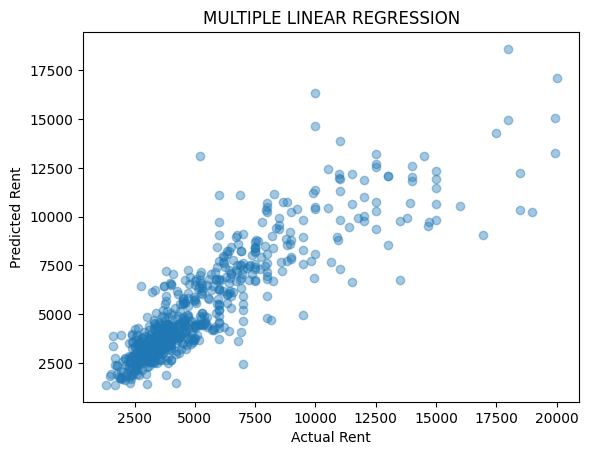

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
print(mlr.coef_)


[[-339.72565082 1227.18378185    4.89533735  -16.6268309    23.28064288
    -7.60690037 -154.12809754   99.67652733  126.6406987  -214.50540499
   122.40027594  -57.87786551 -147.43990886   25.46468481]]


## Evaluating Trained Model (Coedfficient of Determination)

In [8]:
X_test = test_set[['도서권수']]
y_test = test_set['대출건수']

lr.score(X_test, y_test) # Bad model

0.10025676249337057

In [9]:
# 대출 건수로 대출건수를 예측한다면? 
lr.fit(y_train.to_frame(), y_train) # y_train은 시리즈므로 fit() 입력을 위해 2차원 배열로 만들어줌 
lr.score(y_test.to_frame(), y_test) 
# Accurate model

1.0

## 연속적인 값 예측하기: 선형 회귀

In [10]:
print(lr.coef_, lr.intercept_)
# 기울기 a와 절편 b 의 값
# 기울기는 -1 이고 절편은 0에 가까운 음수. 
# y = 1x x +0
# 의미없다. 

[1.] -1.2647660696529783e-12


## Evaluating a Model's Accuracy

In [ ]:
print(mlr.score(x_train, y_train))
# 주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다

0.7800151630882293


## Predicting Categories (Logistic Regressions)

대출 정수 is a categorical variable


In [11]:
borrow_mean = ns_book7['대출건수'].mean()
y_train_c = y_train > borrow_mean # It is a positive class if it is higher than the borrow mean
y_test_c = y_test > borrow_mean # 

In [12]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train_c)
logr.score(X_test, y_test_c) #  71 % Accuracy

0.7106154385145393

In [ ]:
y_test_c.value_counts()

대출건수
False    65337
True     28856
Name: count, dtype: int64

# Examples of Logistic Regressions

In [ ]:
import pandas as pd
passengers = pd.read_csv("titanic.csv")

print(passengers.shape)

(891, 12)


In [ ]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
passengers['Sex'] = passengers['Sex'].map({'female':1,'male':0})


In [ ]:
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)
# Age 값이 비어있는 경우에 대해 평균 값으로 결측치를 채움
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)
#Pcalss의 경우 1등석에 탔는지, 2등석에 탔는지에 대해 각각의 feature로 만들어주기 위해 컬럼을 새로 생성

In [ ]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [ ]:
#지스틱 회귀는 실행할 때 regularation을 사용하기 때문에 그 전에 반드시 우리가 가진 데이터를 스케일링하는 작업이 필요
#StandardScaler를 사용하면 아래와 같이 데이터를 정규화(스케일링) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
print(model.score(train_features, train_labels))


0.7694610778443114


In [ ]:
print(model.coef_)

[[ 1.14312122 -0.43413008  0.97914636  0.52563822]]


# Extra Examples

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
data = datasets.load_iris()

#데이터셋
input_data = data['data'] # 꽃의 특징 (input data)
target_data = data['target'] #꽃 종류를 수치로 나탄내 것 (0 ~ 2) (target data)

flowers = data['target_names'] # 꽃 종류를 이름으로 나타낸 것
feature_names = data['feature_names'] # 꽃 특징들의 명칭


#sepal : 꽃받침
#petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


In [46]:
iris_df = pd.DataFrame(input_data, columns=feature_names)
iris_df['species'] = target_data

#맨 위에 있는 데이터 10개 출력
print(iris_df.head(10))
#데이터의 정보 출력
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  


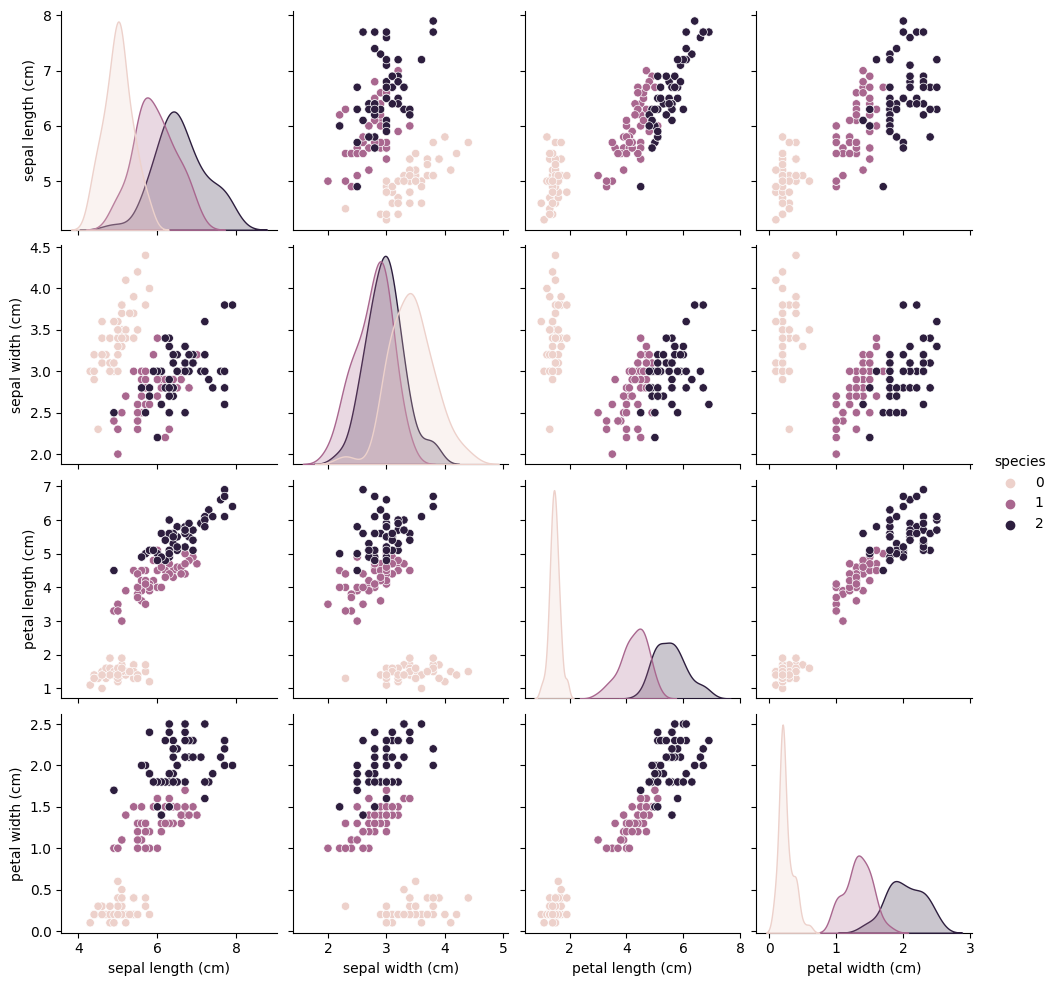

In [47]:
#데이터 개괄적 특징 파악
sns.pairplot(iris_df, hue='species', vars=feature_names)

plt.show()

In [48]:
#훈련 데이터와 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, random_state=42)

#표준점수로 데이터 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

In [49]:
lr = LogisticRegression(max_iter=1000)

#로지스틱 회귀 학습
lr.fit(train_scaled, train_target)

#테스트 데이터 예측
pred = lr.predict(test_scaled[:5])
print(pred)

[1 0 2 1 1]


In [50]:
#로지스틱 회귀 모델의 가중치와 절편
#다중 분류 가중치와 절편을 출력하면, 각 클래스마다의 가중치 절편을 출력한다.
print(lr.coef_, lr.intercept_)

[[-0.97511573  1.08893052 -1.78416098 -1.65224049]
 [ 0.5072161  -0.30353329 -0.3290721  -0.69052199]
 [ 0.46789963 -0.78539723  2.11323308  2.34276248]] [-0.39150253  1.92427457 -1.53277204]


In [51]:
#결정 함수(decision_function)로 z1 ~ z3의 값을 구한다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.21  2.1   0.1 ]
 [ 5.87  2.56 -8.43]
 [-9.33  1.8   7.53]
 [-2.29  1.73  0.56]
 [-3.59  2.33  1.26]]


In [52]:
#소프트맥스 함수를 사용한 각 클래스들의 확률
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.012 0.87  0.118]
 [0.965 0.035 0.   ]
 [0.    0.003 0.997]
 [0.013 0.752 0.234]
 [0.002 0.745 0.253]]


## Correlations


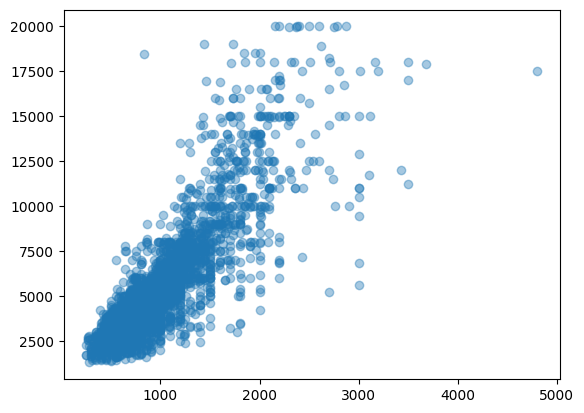

In [ ]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

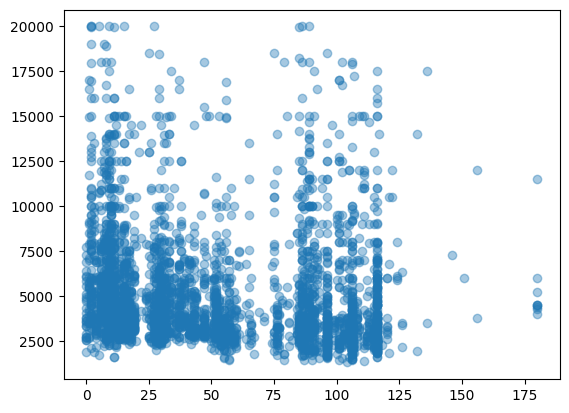

In [ ]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

# Analysis of Multiple Regressions

In [ ]:
import pandas as pd
df = pd.read_csv("manhattan.csv")
df.head()
# rent 라는 임대료를 예측

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [ ]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

# Examples of Multiple Regressions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filename = '교육부_학생건강검사 결과_20151201.csv'
df = pd.read_csv(filename, encoding='cp949')

In [ ]:
df = df.reset_index()

In [ ]:
# 불필요한 칼럼 제거
df = df[['몸무게','키']]

In [ ]:
# Nan 데이터 제거(공백 데이터)
df = df.dropna()

In [ ]:
weight = []
height = []

# 키와 몸무게 칼럼 추출
weight.extend(df['몸무게'])
height.extend(df['키'])

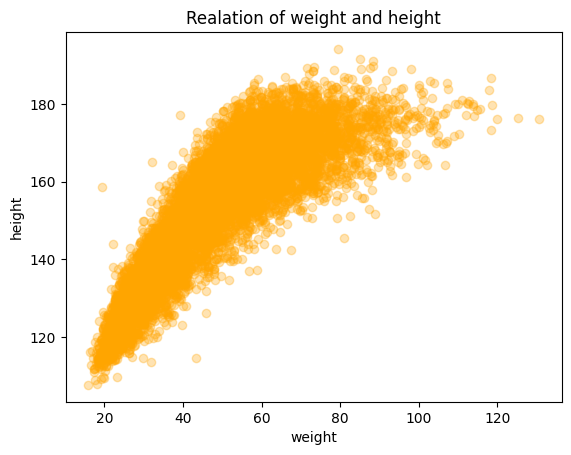

In [ ]:
plt.figure()
plt.scatter(weight,height, alpha=0.3,color = 'orange')
plt.title('Realation of weight and height') 
plt.xlabel('weight') 
plt.ylabel('height')
plt.show()

## Polynomial Regressions using sklearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# PolynomialFeatures 에 맞게 데이터를 변형 시켜줍니다.
weight_real =np.reshape(weight,(-1, 1))

PolynomialFeatures 옵션

degree : 차수 조절
include_bias : True로 할 경우 0차항(1)을 만듬

In [ ]:
user_degree = 3 # 3차 다항식
# x 에 대한 제곱근 (다항식 형태로 변환)
poly_features  = PolynomialFeatures(degree=user_degree, include_bias=False) # 3차항으로, 그리고 0차항은 제외
X_train_poly = poly_features.fit_transform(weight_real)

print('real weight : ',weight_real[0])
print('poly : ',X_train_poly[0])
# 입력데이터 x / x가 27.3 /  x^2  745.29 / x^3  20346.417

real weight :  [27.3]
poly :  [   27.3     745.29  20346.417]


In [ ]:
#다항 회귀 예측
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, height)
print('intercept : ',lin_reg.intercept_,', coef:' , lin_reg.coef_)
# line_fitter.coef_: 기울기, 다항회귀 공식의 a_1, a_2,..,a_s
# line_fitter.intercept_ : 절편, 다항회귀 공식의 a_0

intercept :  63.1656479678945 , coef: [ 3.23549190e+00 -3.16308653e-02  1.03989595e-04]


![image.png](attachment:image.png)

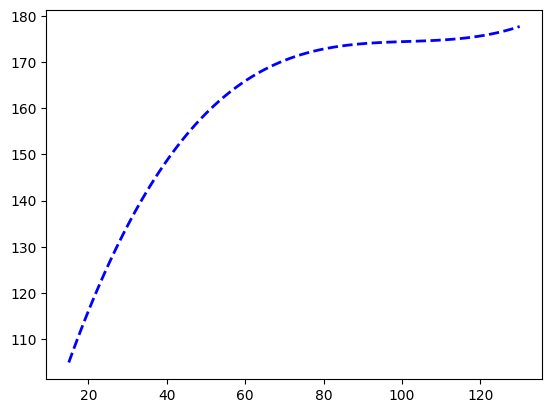

In [ ]:
x_new=np.linspace(15, 130, 100).reshape(-1, 1)
y_new = 63.1656479678945+(x_new*3.23549190e+00)+(-3.16308653e-02*x_new**2)+(1.03989595e-04*x_new**3)
plt.plot(X_new,  y_new, "b--", linewidth=2, label="Predictions")

plt.show()

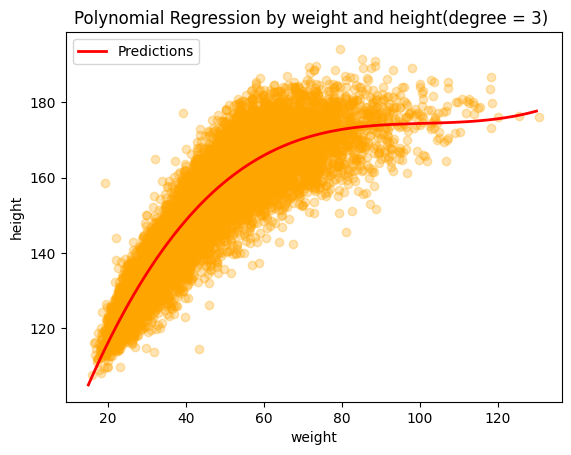

In [ ]:
X_new=np.linspace(15, 130, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
print('===============================================')
plt.figure()
plt.scatter(weight, height, alpha=0.3, color ="orange")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Polynomial Regression by weight and height(degree = %d) '%user_degree) 
plt.xlabel("weight")
plt.ylabel("height")
plt.legend(loc="upper left")
plt.show()

![image.png](attachment:image.png)